# Navigation

---
***Author: Yanxiang Yu***

***Date: April 10, 2020***

In this notebook, we are going to use the deep Q-Network(DQN) algorithm to train a Unity agent: Banana, and pick up yellow banana as much as possible.  

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [2]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [3]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")
env.seed(0)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print(brain_name)

BananaBrain


### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**.

In [6]:
# without trainning the agent, run it 10 times and see what's the average score. 
for i in range(10):
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = np.random.randint(action_size)        # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break

    print("Score: {}".format(score))

Score: 0.0
Score: 1.0
Score: -1.0
Score: 0.0
Score: -1.0
Score: -3.0
Score: 0.0
Score: -1.0
Score: 0.0
Score: 0.0


In [14]:
zz = 0 
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    zz += 1
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break

print("total steps: {} in a session".format(zz))

total steps: 300 in a session


This is an episodical task with total steps of 300, the objective of the task is to collect as many yellow banana during the 300 steps as possible

When finished, you can close the environment.

In [7]:
#env.close()

### 4. Train the agent

Now it's time to train the agent to solve the environment!  We are going to use DQN algorithm to train the agent. 

The detail of DQN can be found in the [Natual paper](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf) by Vovodymyr, etc.

The deep Q-network agent receives only the pixels and the game score as inputs, and combined reinforcement learning with a class of artificial neural network known as deep neural networks. During the training phase, espisode is stored in the memory buffer to avoide the sequence effect. Two action-value function are used during the training, one is the target action-value function Q, and the other is training action-value function Q'. The Q' is updated by comparing the TD error with Q during each training, while Q is updated after certain steps. 

The detailed steps are:
* Initialize replay memory D to capacity N
* Initialize action-value function Q with random weights h
* Initialize target action-value function ^Q with weights h25h
        For episode t=1, M do
            Initialize sequence s1={x_1} and preprocessed sequence Phi1=Phi(s_1)
            For t=1,T do
                With probability e select a random action at
                otherwise select action = argmax_a(Q(Phi,a; theta))
                Execute action at in emulator and observe reward rt and image xt11
                Set stz1~st ,at ,xtz1 and preprocess wtz1~wðstz1Þ
                Store transition wt ,at ,rt ,wtz1
                Sample random minibatch of transitions wj,aj,rj,wjz1 from D
                Set yj = rj if episode terminates at step jz1
                       = rj + Gama*max(a0 * ^Q (Phi_j+1,a0; Theta) otherwise
                Perform a gradient descent step on (y_j - Q)^2 with respect to the network parameters Theta
                Every C steps reset Q' to Q
            End For
        End For

In [8]:
# Here we import the function in the two help function 
from dqn_agent import Agent
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

# there's 37 states and 4 actions for this agent
agent = Agent(state_size=37, action_size=4, seed=0)

# watch an untrained agent
#state = env_info.vector_observations[0]
print(torch.__version__)

0.4.0


#### Model Structure
In the DQN system, we used a two-hidden-layer neural network(NN) to generate the action-value function, each of the hidden layer has 64 units, and both activation function are relu. The input layer of the NN is the 37 states, while the output layer is the values of 4 actions.  

During the training, several key hyperparameters are used to finetune the model, which are:

* BUFFER_SIZE = int(1e5), the replay buffer size for recycling the trajectories

* BATCH_SIZE = 64, the minibatch size, if enough samples are available in memory, get random subset and learn.

* GAMMA = 0.99, the discount factor

* TAU = 1e-3, the factor for soft update of target parameters

* LR = 5e-4, the learning rate 

* UPDATE_EVERY = 4,  how often to update the network during training each episode


Episode 100	Average Score: 0.72
Episode 200	Average Score: 3.51
Episode 300	Average Score: 7.78
Episode 400	Average Score: 9.53
Episode 500	Average Score: 12.42
Episode 600	Average Score: 13.45
Episode 700	Average Score: 14.92
Episode 703	Average Score: 15.03
Environment solved in 603 episodes!	Average Score: 15.03


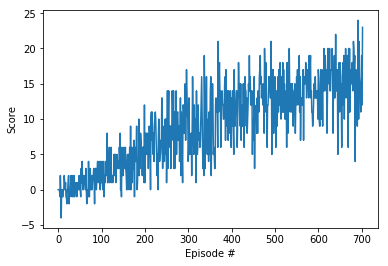

In [9]:
# train the model with DQN
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        #for t in range(max_t):
        while True:
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            score += reward
            state = next_state
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=15.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_over15.pth')
            break
    
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [10]:
# you may direcload the weights from file
#agent.qnetwork_local.load_state_dict(torch.load('checkpoint_over15.pth'))
scores = []
for i in range(1, 101):
    env_info = env.reset()[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state)                 # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
    scores.append(score)
    if i % 10 == 0:
        print('\rEpisode {}\tScore: {:.2f}'.format(i, score))

Episode 10	Score: 25.00
Episode 20	Score: 4.00
Episode 30	Score: 13.00
Episode 40	Score: 19.00
Episode 50	Score: 14.00
Episode 60	Score: 15.00
Episode 70	Score: 13.00
Episode 80	Score: 19.00
Episode 90	Score: 15.00
Episode 100	Score: 16.00


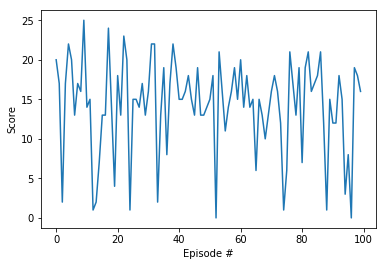

In [11]:
# plot the scores for trainned agent during the 100 games
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [15]:
print('The average score of 100 epsoides is:',np.mean(scores))

The average score of 100 epsoides is: 14.26


### 5. Summay and Future Work

In this notebook, we used DQN algorithm to train the Unity agent: Banana navigation. Only 700 epsoides are used to train the agent, and an average score of 14.26 for 100 epsoides is achieved with the trainned agent. 

To further improving the agent's performance, we can further training the agent with different hyper-parameters, such as tune the total training episodes, change the epsilon-decay rate to a smaller number, change batch size,discount factor or update frequency, and so on. In addtion, We can try some other more advanced techniques, including:
* Double DQN: Use a third action-value function as a benchmark, and pnly update the Q function when these two select the same best value. 
* Duelling networks: Use two streams of training layers, and one for the state values, and the other for advantage values. 

Thank you for reading!